In [46]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [47]:
#13k top spotify songs 
df=pd.read_csv('data/df.csv', sep=",")
#users favorite tracks based on time 
df_fav=pd.read_csv('data/df_fav.csv', sep=",")

In [48]:
# Create new column with minutes listened to
df['minutes'] = df['length'] / 60000
df_fav['minutes'] = df_fav['length'] / 60000

# Calculate beat density (beats per minute)
df['beat_density'] = df['tempo'] / df['minutes']
df_fav['beat_density'] = df_fav['tempo'] / df_fav['minutes']
#Popularity Rank
df['Popularity_Rank'] = df['Popularity'].rank(ascending=False)
df_fav['Popularity_Rank'] = df_fav['Popularity'].rank(ascending=False)


df['melody_complexity'] = df['tempo'] * df['time_signature']
df_fav['melody_complexity'] = df_fav['tempo'] * df_fav['time_signature']

df['instrumental_acoustic_ratio'] = df['instrumentalness'] / df['acousticness']
df_fav['instrumental_acoustic_ratio'] = df_fav['instrumentalness'] / df_fav['acousticness']


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   track_id                     12476 non-null  object 
 1   Song                         12476 non-null  object 
 2   Artists                      12476 non-null  object 
 3   Album                        12476 non-null  object 
 4   length                       12476 non-null  int64  
 5   time_signature               12476 non-null  int64  
 6   danceability                 12476 non-null  float64
 7   acousticness                 12476 non-null  float64
 8   energy                       12476 non-null  float64
 9   tempo                        12476 non-null  float64
 10  instrumentalness             12476 non-null  float64
 11  loudness                     12476 non-null  float64
 12  liveness                     12476 non-null  float64
 13  key             

In [50]:
df = pd.concat([df, df_fav])

In [51]:
df.shape

(12594, 24)

In [52]:
df

,track_id,Song,Artists,Album,length,time_signature,danceability,acousticness,energy,tempo,...,valence,speechiness,mode,Popularity,favorite,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio
0,3rUGC1vUpkDG9CZFHMur1t,greedy,['Tate McRae'],greedy,131872,1,0.750,0.2560,0.733,111.018000,...,0.844,0.0319,0,98.000,0,2.197867,5.051171e+01,4.5,111.018000,0.000000
1,7aqfrAY2p9BUSiupwk3svU,First Person Shooter (feat. J. Cole),"['Drake', 'J. Cole']",For All The Dogs,247444,4,0.470,0.0277,0.640,163.920000,...,0.248,0.3200,1,91.000,0,4.124067,3.974718e+01,49.5,655.680000,0.000000
2,7dJYggqjKo71KI9sLzqCs8,Agora Hills,['Doja Cat'],Scarlet,265360,4,0.750,0.2280,0.674,123.026000,...,0.392,0.0970,0,89.000,0,4.422667,2.781715e+01,89.5,492.104000,0.000391
3,4MjDJD8cW7iVeWInc2Bdyj,MONACO,['Bad Bunny'],nadie sabe lo que va a pasar mañana,267194,4,0.787,0.1500,0.621,139.056000,...,0.130,0.0680,0,94.000,0,4.453233,3.122585e+01,21.0,556.224000,0.002680
4,5aIVCx5tnk0ntmdiinnYvw,Water,['Tyla'],Water,200256,4,0.673,0.0856,0.722,117.187000,...,0.519,0.0755,0,92.000,0,3.337600,3.511116e+01,37.5,468.748000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,5R2rsbwCDXORX2tLfprRmM,Yacht Club (feat. Juice WRLD),Lil Yachty,Nuthin' 2 Prove,166343,72,0.721,0.3170,0.508,0.000000,...,4.000,1.0000,7,0.457,1,2.772383,0.000000e+00,39.0,0.000000,0.482650
114,6DZz58CbF0AKw5PCKqNKcM,Come to Life,Kanye West,Donda,310393,0,0.440,0.6890,0.465,0.000001,...,4.000,1.0000,3,0.241,1,5.173217,2.435622e-07,69.0,0.000000,0.557329
115,3CA9pLiwRIGtUBiMjbZmRw,Nice For What,Drake,Scorpion,210746,82,0.585,0.0891,0.909,0.000097,...,4.000,1.0000,8,0.758,1,3.512433,2.761618e-05,10.0,0.007954,1.335578
116,27GmP9AWRs744SzKcpJsTZ,Jumpman,Drake,What A Time To Be Alive,205879,74,0.852,0.0559,0.553,0.000000,...,4.000,1.0000,1,0.656,1,3.431317,0.000000e+00,21.0,0.000000,5.939177


In [53]:
# Dropping columns that could lead to data leakage
df_num= df.drop(columns=['track_id','Song', 'Album', 'Artists' ])

In [54]:
df_cat = df[['track_id', 'Song', 'Album', 'Artists']]

## Hot encoding 

In [55]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [56]:
df_hot = df 

In [57]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = df_hot['Artists'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df_hot['artists'] = np.argmax(one_hot_encoded_artists, axis=1)


In [58]:
#albums 


# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = df_hot['Album'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df_hot['album'] = np.argmax(one_hot_encoded_artists, axis=1)


In [59]:
# Assuming df_hot is the DataFrame you're working with
desired_column_order = ['track_id','length', 'artists', 'album', 'time_signature', 'danceability', 'acousticness', 'energy', 'tempo', 'instrumentalness', 'loudness', 'liveness', 'key', 'valence', 'speechiness', 'mode', 'Popularity', 'minutes', 'beat_density','Popularity_Rank','melody_complexity','instrumental_acoustic_ratio','favorite']

# Reorder columns in the DataFrame
df_hot = df_hot[desired_column_order]


In [60]:
df= df.drop(columns=['artists',	'album' ])

In [61]:
df_hot.head()

,track_id,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
0,3rUGC1vUpkDG9CZFHMur1t,131872,7016,9646,1,0.750,0.2560,0.733,111.018,0.000000,...,0.844,0.0319,0,98.0,2.197867,50.511708,4.5,111.018,0.000000,0
1,7aqfrAY2p9BUSiupwk3svU,247444,2075,2891,4,0.470,0.0277,0.640,163.920,0.000000,...,0.248,0.3200,1,91.0,4.124067,39.747175,49.5,655.680,0.000000,0
2,7dJYggqjKo71KI9sLzqCs8,265360,2007,7025,4,0.750,0.2280,0.674,123.026,0.000089,...,0.392,0.0970,0,89.0,4.422667,27.817154,89.5,492.104,0.000391,0
3,4MjDJD8cW7iVeWInc2Bdyj,267194,742,9691,4,0.787,0.1500,0.621,139.056,0.000402,...,0.130,0.0680,0,94.0,4.453233,31.225851,21.0,556.224,0.002680,0
4,5aIVCx5tnk0ntmdiinnYvw,200256,7579,9135,4,0.673,0.0856,0.722,117.187,0.000000,...,0.519,0.0755,0,92.0,3.337600,35.111158,37.5,468.748,0.000000,0


In [62]:
df_hot.to_csv('data/df_hot.csv', index=False)

In [63]:
df_hot_num= df_hot.drop(columns=['track_id' ])

In [64]:
corr = df_hot_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
length,1.000000,-0.008983,-0.001882,-0.032079,-0.291032,0.245579,-0.266986,-0.100453,0.267301,-0.288331,-0.046754,-0.033598,-0.174053,-0.108125,0.000806,-0.194682,1.000000,-0.519352,0.212893,-0.113289,-0.005410,-0.030234
artists,-0.008983,1.000000,0.058259,-0.163912,-0.027774,-0.024876,0.040306,0.083361,-0.025271,0.039659,0.025086,-0.157273,-0.113484,-0.080025,-0.082651,0.053177,-0.008983,0.073615,0.016042,0.078417,0.006096,-0.168110
album,-0.001882,0.058259,1.000000,0.007713,-0.028183,0.047164,-0.044674,-0.006696,0.012330,-0.037943,0.005318,0.008115,-0.006469,-0.013033,0.010263,-0.022219,-0.001882,0.001315,0.022292,-0.010660,0.005092,0.007050
time_signature,-0.032079,-0.163912,0.007713,1.000000,0.098211,-0.053774,0.011488,-0.354969,-0.002060,0.042965,-0.008512,0.913523,0.781417,0.405236,0.512862,-0.227601,-0.032079,-0.174637,-0.167969,-0.302665,-0.003451,0.971982
danceability,-0.291032,-0.027774,-0.028183,0.098211,1.000000,-0.479613,0.421915,0.038705,-0.288730,0.497853,-0.020742,0.083453,0.377975,0.232150,-0.039652,0.274074,-0.291032,0.128705,-0.318992,0.111603,-0.039340,0.083934
acousticness,0.245579,-0.024876,0.047164,-0.053774,-0.479613,1.000000,-0.845074,-0.257731,0.366818,-0.777826,-0.137243,-0.049008,-0.242759,-0.111478,0.055468,-0.318250,0.245579,-0.138015,0.329993,-0.323482,-0.039205,-0.037923
energy,-0.266986,0.040306,-0.044674,0.011488,0.421915,-0.845074,1.000000,0.306143,-0.351459,0.851628,0.201977,0.008998,0.247958,0.099899,-0.067574,0.301593,-0.266986,0.192647,-0.294799,0.369593,0.039256,-0.003962
tempo,-0.100453,0.083361,-0.006696,-0.354969,0.038705,-0.257731,0.306143,1.000000,-0.121086,0.265663,0.066720,-0.348380,-0.212988,-0.101379,-0.198533,0.203514,-0.100453,0.530243,-0.046155,0.929364,0.005168,-0.371333
instrumentalness,0.267301,-0.025271,0.012330,-0.002060,-0.288730,0.366818,-0.351459,-0.121086,1.000000,-0.533006,-0.099570,0.004563,-0.201461,-0.131155,-0.007469,-0.287697,0.267301,-0.132298,0.309097,-0.149084,0.073029,0.005347
loudness,-0.288331,0.039659,-0.037943,0.042965,0.497853,-0.777826,0.851628,0.265663,-0.533006,1.000000,0.155501,0.032722,0.261172,0.121559,-0.037746,0.356414,-0.288331,0.167183,-0.368028,0.326621,0.012238,0.027500


In [65]:
df_hot.head()

,track_id,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
0,3rUGC1vUpkDG9CZFHMur1t,131872,7016,9646,1,0.750,0.2560,0.733,111.018,0.000000,...,0.844,0.0319,0,98.0,2.197867,50.511708,4.5,111.018,0.000000,0
1,7aqfrAY2p9BUSiupwk3svU,247444,2075,2891,4,0.470,0.0277,0.640,163.920,0.000000,...,0.248,0.3200,1,91.0,4.124067,39.747175,49.5,655.680,0.000000,0
2,7dJYggqjKo71KI9sLzqCs8,265360,2007,7025,4,0.750,0.2280,0.674,123.026,0.000089,...,0.392,0.0970,0,89.0,4.422667,27.817154,89.5,492.104,0.000391,0
3,4MjDJD8cW7iVeWInc2Bdyj,267194,742,9691,4,0.787,0.1500,0.621,139.056,0.000402,...,0.130,0.0680,0,94.0,4.453233,31.225851,21.0,556.224,0.002680,0
4,5aIVCx5tnk0ntmdiinnYvw,200256,7579,9135,4,0.673,0.0856,0.722,117.187,0.000000,...,0.519,0.0755,0,92.0,3.337600,35.111158,37.5,468.748,0.000000,0


In [66]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assuming X contains your feature data and y contains the target variable
# X should be a pandas DataFrame or a NumPy array
# y should be a pandas Series or a NumPy array

X = df_hot_num.drop('favorite', axis=1)  # X contains all columns except the 'favorite' column
y = df_hot_num['favorite'] 

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model with your data
rf.fit(X, y)

# Retrieve feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to better visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.05  # Adjust this value according to your requirements

# Select features based on the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# Use selected features for your classification model
X_selected = X[selected_features]


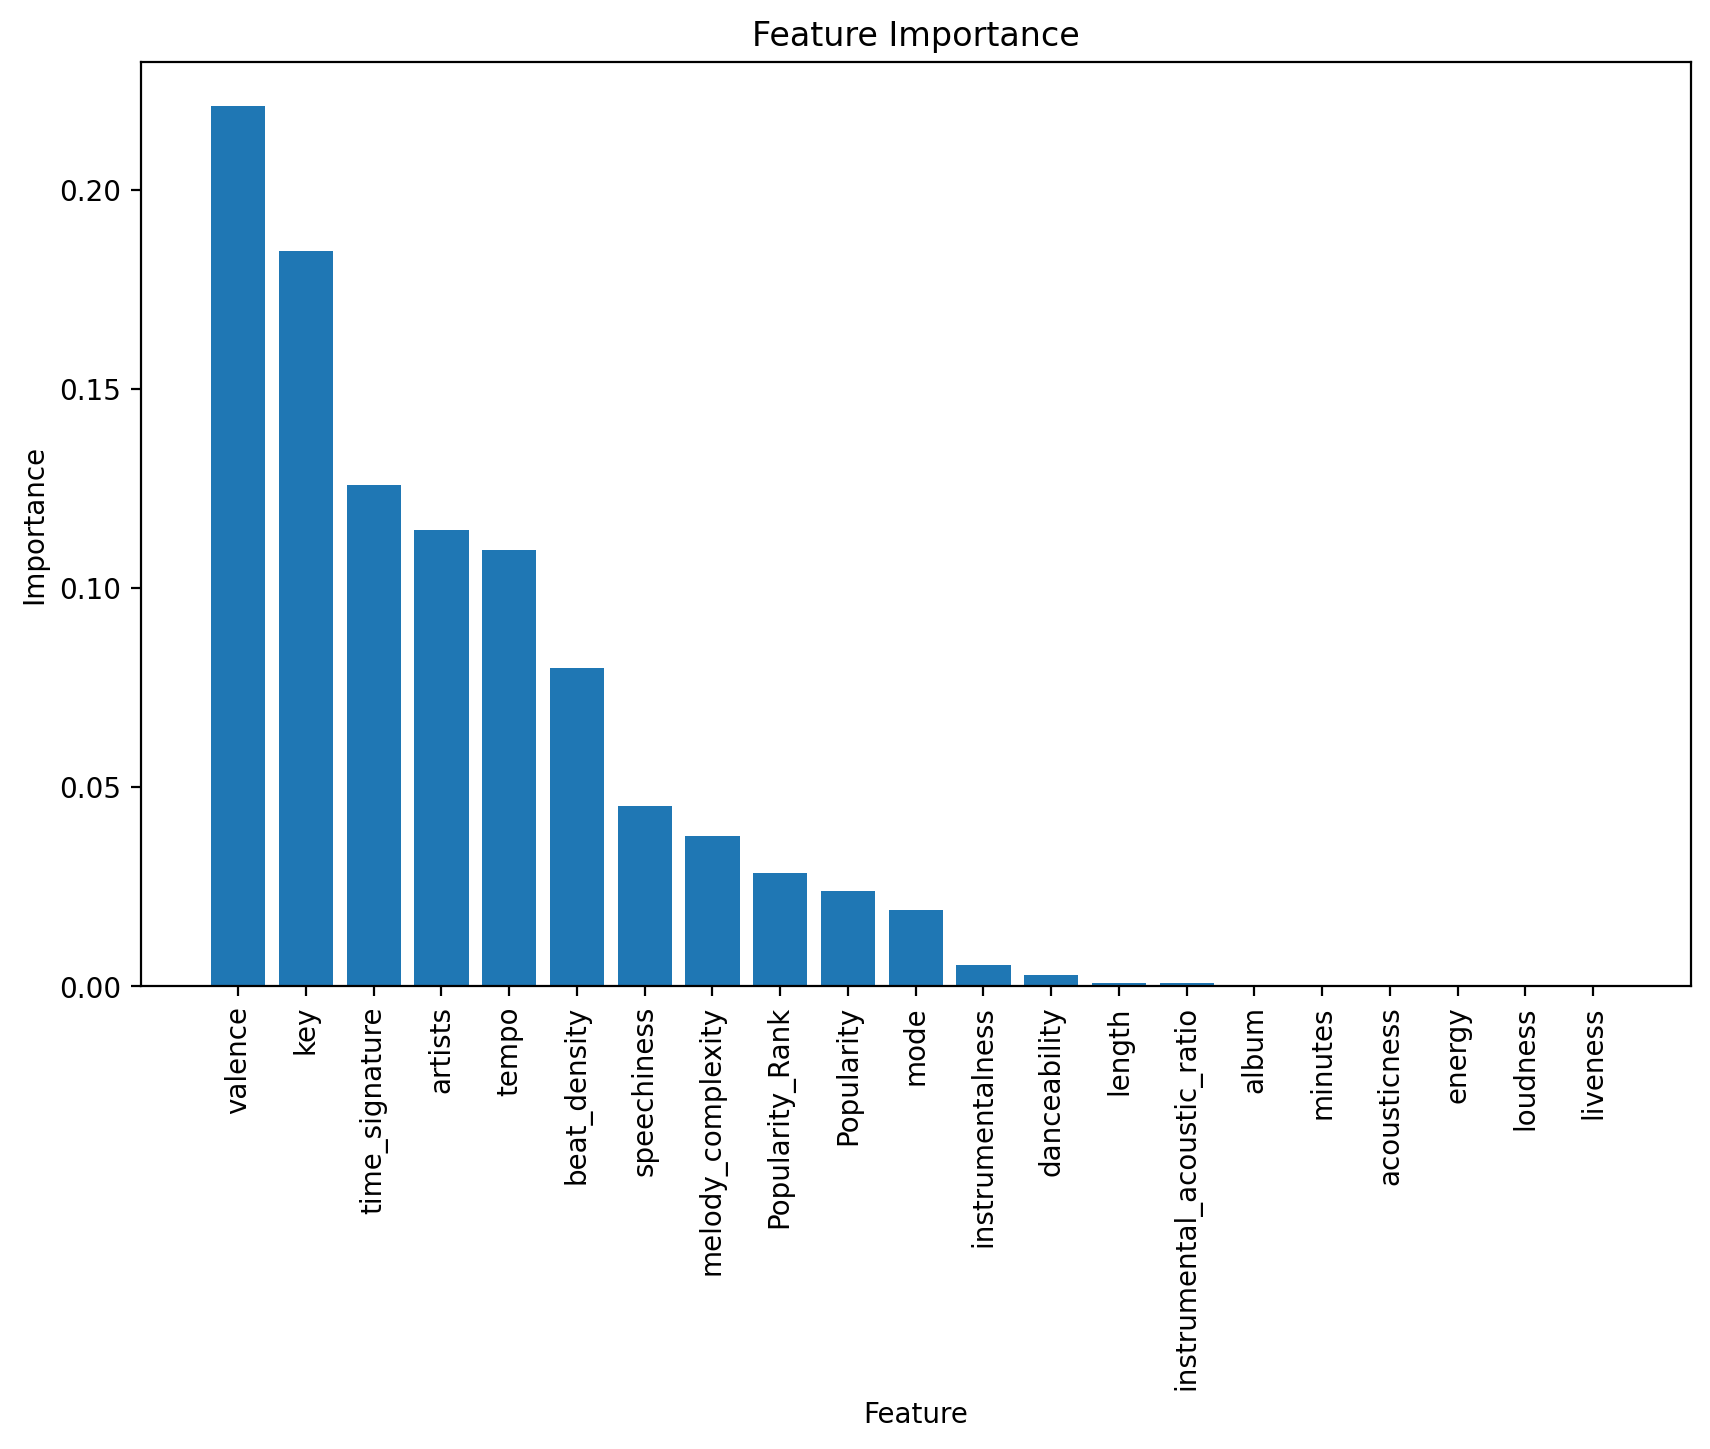

In [67]:
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained Random Forest model
feature_importance = rf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), X.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [23]:

import pandas as pd
import numpy as np

corr = X_selected.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,artists,valence,key,tempo,time_signature
artists,1.000000,-0.113484,-0.157273,0.083361,-0.163912
valence,-0.113484,1.000000,0.759064,-0.212988,0.781417
key,-0.157273,0.759064,1.000000,-0.348380,0.913523
tempo,0.083361,-0.212988,-0.348380,1.000000,-0.354969
time_signature,-0.163912,0.781417,0.913523,-0.354969,1.000000
